In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston 

In [3]:
boston = load_boston()

In [4]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'] )

In [5]:
data=pd.concat([features, target], axis=1)

In [6]:
sep = 0.8*len(data)
sep = int(sep)

x_train = np.array(data['RM'] [:sep])
y_train = np.array(data['TARGET'] [:sep])

x_test=np.array(data['RM'][sep:])
y_test=np.array(data['TARGET'][sep:])

x_train=x_train/x_train.mean()
y_train=y_train/y_train.mean()

x_test=x_test/x_test.mean()
y_test=y_test/y_test.mean()

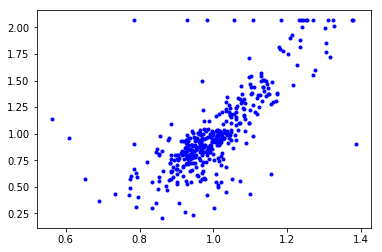

In [8]:
plt.plot(x_train,y_train,'b.')


In [51]:
def hypothesis(a,b,x):
    return (a*x+b)

In [52]:
def error(a,b,x,y):
    e=0
    m=len(y)
    for i in range(m):
        e +=np.power(hypothesis(a,b,x[i])-y[i],2)
    return (1/(2*m))*e

In [53]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(y)
    for i in range(m):
        grad_a += 2/m *((hypothesis(a,b,x[i])-y[i]) * x[i])
        grad_b += 2/m *(hypothesis(a,b,x[i])-y[i]) 
        
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    
    return a,b

In [54]:
def descend(initial_a,initial_b,x,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    for i in range(iterations):
        e = error(a,b,x,y)
        a,b = step_gradient(a,b,x,y,learning_rate)
        if i % 1000 == 0:
            print(f"Error:{e}, a:{a}, b:{b}")
        a,b = step_gradient(a,b,x,y,learning_rate)
                  
    return a,b

In [58]:
init_a=0
init_b=0
iters=10000
learning_rate=0.01

In [59]:
final_a,final_b=descend(init_a,init_b,x_train,y_train,learning_rate,iters)

Error:0.5731901720028545, a:0.020660080154957843, b:0.01999999999999999
Error:0.04754528884032505, a:0.9677116111407453, b:0.04237719101209513
Error:0.04126796276856179, a:1.319787572332104, b:-0.3120520397808212
Error:0.03757754176233279, a:1.5897398438763721, b:-0.5838086676132802
Error:0.03540795441773437, a:1.7967242362936118, b:-0.792176540109717
Error:0.03413246058169318, a:1.9554283600235338, b:-0.9519414394425844
Error:0.0333826016143511, a:2.0771138581170816, b:-1.0744402812891258
Error:0.0329417617960667, a:2.1704155323159964, b:-1.1683655822557517
Error:0.03268259340060975, a:2.241954068499079, b:-1.2403822807705365
Error:0.032530229085006114, a:2.2968058404866523, b:-1.2956006810481333


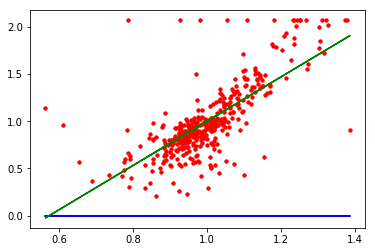

In [60]:
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(init_a, init_b, x_train), 'b')
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(final_a, final_b, x_train), 'g')